<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/investigacion_dengue/blob/main/machine_learning/1_time_series/6_seminario%206%3A%20time_series_basics/6_seminario_time_series_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

### [Video de apoyo](https://www.youtube.com/watch?v=-sNbp4PIuV4)

<img src = 'https://github.com/marco-canas/investigacion_dengue/blob/main/machine_learning/images/calculo_diferencial_2023-09-22%20at%2012.12.55%20PM.jpeg?raw=true'>

# Seminario en Machine learning para SAT-dengue

## Objetivo

* Obtención de los datos de las estaciones del proyecto Antioquia mira su cielo [obtenga los datos de Antioquia Mira su Cielo Aquí(AMSC)](http://54.146.188.73:8501/)

* [Datos Facom](http://44.201.207.176/pagina2/estructura.html)

* Visualización de los datos de AMSC con plotly

* adquirir habilidades de codificación para manipular series de tiempo de la mano de Wes Mckinney
* Introducción a las maquinas de soporte vectorial según Aurelien Geron. 



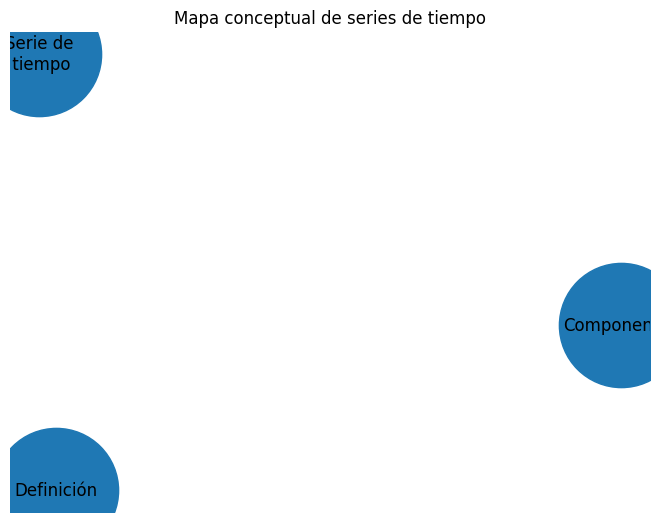

In [19]:
# Mapa conceptual
import matplotlib.pyplot as plt 
import networkx as nx 

# Crear un objeto de grafo dirigido
G = nx.DiGraph() 

#

G.add_node('Serie de\n tiempo')
G.add_node('Definición')
G.add_node('Componentes')

# Dibujar el mapa conceptual utilizando networkx y matplotlib

pos = nx.spring_layout(G, seed = 48) # con ubicaciones aleatorias fijadas
labels = {node:node for node in G.nodes()}

nx.draw(G, pos, with_labels = True, node_size = 8000)

plt.title('Mapa conceptual de series de tiempo')
plt.savefig('mapa_conceptuual_series_de_tiempo.png')
plt.show()


## Obtención y visualización de los datos de AMSC

In [ ]:
import pandas as pd 

url = 'https://raw.githubusercontent.com/marco-canas/didactica_ciencia_datos/main/3_datasets/antioquia_mira_su_cielo/A2023M1_to_M9/marco_2023-09-22_20_13_29(1).csv'

df = pd.read_csv(url)

In [ ]:
df.head() 

In [ ]:
df.keys()


In [ ]:
df.temperatura

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.temperatura)

plt.savefig('/home/marco/Documentos/investigacion/investigacion_dengue/machine_learning/images/temperatura_yarumal_2023.jpg')




# Visualización con plotly

In [1]:
import plotly.express as px
import pandas as pd

# Lee los datos del archivo CSV
archivo_csv = "datos_temoeratura_22_sep_medellin_2023-09-23_15_39_37.csv"
df = pd.read_csv(archivo_csv)

# Asegúrate de que la columna de fecha esté en formato datetime
df['Fecha'] = pd.to_datetime(df['fecha'])

# Crea una gráfica de líneas interactiva con Plotly Express
fig = px.line(df, x='fecha', y='temperatura', title='Serie de Tiempo de Temperatura')
fig.update_xaxes(title_text='Fecha')
fig.update_yaxes(title_text='Temperatura (°C)')

# Personaliza el diseño de la gráfica si es necesario
# fig.update_layout(
#     xaxis=dict(
#         showline=True,
#         showgrid=False
#     ),
#     yaxis=dict(
#         showline=True,
#         showgrid=False
#     )
# )

# Muestra la gráfica
fig.show()


## [Video de apoyo graficación con plotly](https://www.youtube.com/watch?v=pTjH21x2pSY)

## Time Series según Wes

## 11.2 Time Series Basics


A basic kind of time series object in pandas is a Series indexed by timestamps, which
is often represented external to pandas as Python strings or datetime objects:

In [ ]:
import numpy as np 
import pandas as pd 
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7), datetime(2011, 1, 8),
datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts


In [ ]:

2011-01-02

# Máquinas de soporte vectorial según Geron

Página 219  

Capítulo 5. 

# Chapter 5. Support Vector Machines


A Support Vector Machine (SVM) is a powerful and versatile Machine Learning model,
capable of performing linear or nonlinear classification, regression, and even outlier
detection. It is one of the most popular models in Machine Learning, and anyone interested
in Machine Learning should have it in their toolbox. SVMs are particularly well suited for
classification of complex small- or medium-sized datasets.
This chapter will explain the core concepts of SVMs, how to use them, and how they work.

# Linear SVM Classification


The fundamental idea behind SVMs is best explained with some pictures. 

Figure 5-1 shows
part of the iris dataset that was introduced at the end of Chapter 4. 

The two classes can
clearly be separated easily with a straight line (they are linearly separable). The left plot
shows the decision boundaries of three possible linear classifiers. 

The model whose
decision boundary is represented by the dashed line is so bad that it does not even separate
the classes properly. The other two models work perfectly on this training set, but their
decision boundaries come so close to the instances that these models will probably not
perform as well on new instances. In contrast, the solid line in the plot on the right
represents the decision boundary of an SVM classifier; this line not only separates the two
classes but also stays as far away from the closest training instances as possible. You can
think of an SVM classifier as fitting the widest possible street (represented by the parallel
dashed lines) between the classes. This is called large margin classification.


# Linear SVM Classification

The book starts with a few figures, before the first code example, so the next three cells generate and save these figures. You can skip them if you want.


In [ ]:

# extra code – this cell generates and saves Figure 5–1

import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5 * x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_

    plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2)
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAA',
                zorder=-1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plt.grid()

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plt.grid()

save_fig("large_margin_classification_plot")
plt.show()



# Referencias

* Géron, A. (2022). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow. " O'Reilly Media, Inc.".

* [McKinney, W. (2022). Python for data analysis. " O'Reilly Media, Inc.".](https://d1wqtxts1xzle7.cloudfront.net/62139307/Python-for-Data-Analysis-2nd-Edition20200219-40214-1of6b7q-libre.pdf?1582110463=&response-content-disposition=inline%3B+filename%3DPython_for_Data_Analysis.pdf&Expires=1694149999&Signature=MH1uVxkUnFgwepQUeb-3OdFgQWj0vmtzC4ra~TZ-xyCstLSCg7uaNeDi4yrXghoJ6UEMCGOJkx2s13vayVVP-IzF8I91v6TeW0ZUeIejbWlrkHxtT01V-fJ6q7C~9buozUwVr~o2BY3llLH5rZVlZF31pPefEm3ejjlW8pO~prbQ8VVfyfXs4HzSIQJ~nbTCZU8LfqYwU3yMLV7IH4TQN9eGd8GZuqHjznUJZU995AwYqQqzl5-Xtoz93-S1Pn2UWuS8SsXmFt1ysr~-M7-6lVQw~E9~MFbdCIQRfp~fRtVtHDfB-mEXNEQ1CX518xUB0xT3JtfZdsGArib9UMwOqg__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA)

<img src = 'https://wesmckinney.com/images/wes-2017-01-12-small.png' width = 200>

* [Documentación de la función nx.spring_layout()](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html)